In [18]:
import pandas as pd

df_1 = pd.read_csv('tas_NLD/tas_1901_1930_NLD.csv')

df_2 = pd.read_csv('tas_NLD/tas_1931_1960_NLD.csv')

df_3 = pd.read_csv('tas_NLD/tas_1961_1990_NLD.csv')

df_4 = pd.read_csv('tas_NLD/tas_1991_2016_NLD.csv')

In [19]:
df = pd.concat([df_1, df_2, df_3, df_4])

In [41]:
df.columns

Index(['Temperature - (Celsius)', ' Year', ' Statistics', ' Country', ' ISO3',
       'predict'],
      dtype='object')

In [21]:
import matplotlib.pyplot as plt

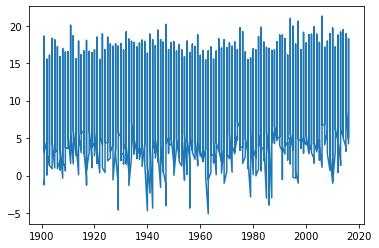

In [38]:
plt.plot(df[' Year'], df['Temperature - (Celsius)'])

In [28]:
import sklearn

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [33]:
model.fit(X = df[' Year'].to_numpy().reshape(-1, 1), y = df['Temperature - (Celsius)'])

LinearRegression()

In [35]:
df['predict'] = model.predict(X = df[' Year'].to_numpy().reshape(-1, 1))

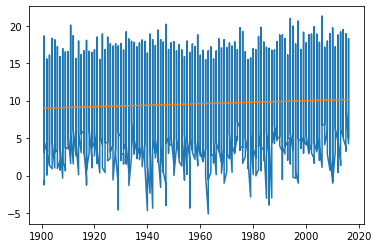

In [39]:
plt.plot(df[' Year'], df['Temperature - (Celsius)'])
plt.plot(df[' Year'], df['predict'])

Jun
Jul
Aug


/var/folders/_d/f011cjln475blfn752zym_l80000gn/T/ipykernel_36033/2301357336.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['predict'] = model.predict(X = data[' Year'].to_numpy().reshape(-1, 1))
/var/folders/_d/f011cjln475blfn752zym_l80000gn/T/ipykernel_36033/2301357336.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['predict'] = model.predict(X = data[' Year'].to_numpy().reshape(-1, 1))
/var/folders/_d/f011cjln475blfn752zym_l80000gn/T/ipykernel_36033/2301357336.py:11: SettingWithCopyWa

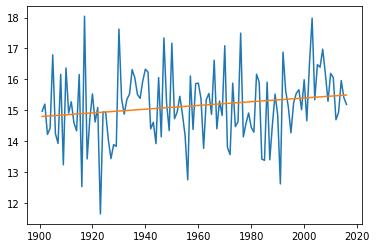

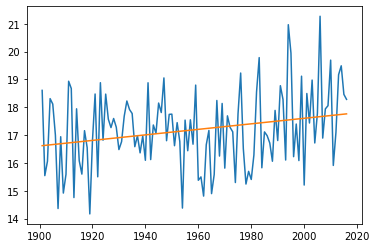

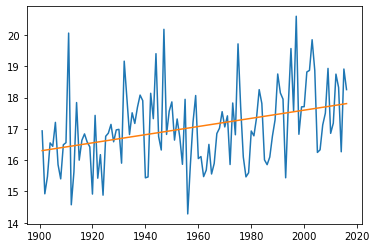

In [48]:
for month in ['Jun', 'Jul', 'Aug']:
    
    print(month)
    
    data = df[df[' Statistics'] == ' ' + month + ' Average']
    
    model = LinearRegression()
    
    model.fit(X = data[' Year'].to_numpy().reshape(-1, 1), y = data['Temperature - (Celsius)'])
    
    data['predict'] = model.predict(X = data[' Year'].to_numpy().reshape(-1, 1))
    
    plt.figure()
    
    plt.plot(data[' Year'], data['Temperature - (Celsius)'])
    plt.plot(data[' Year'], data['predict'])

/var/folders/_d/f011cjln475blfn752zym_l80000gn/T/ipykernel_36033/563804663.py:3: FutureWarning: [' Statistics', ' Country', ' ISO3'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data = df.groupby(' Year').aggregate(np.average)


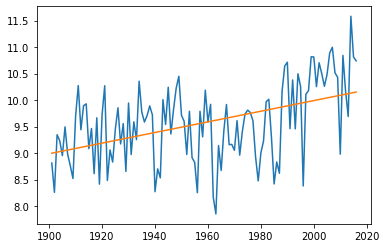

In [62]:
import numpy as np

data = df.groupby(' Year').aggregate(np.average)

data['Year'] = data.index

model = LinearRegression()
    
model.fit(X = data['Year'].to_numpy().reshape(-1, 1), y = data['Temperature - (Celsius)'])

data['predict'] = model.predict(X = data['Year'].to_numpy().reshape(-1, 1))

plt.figure()

plt.plot(data['Year'], data['Temperature - (Celsius)'])
plt.plot(data['Year'], data['predict'])

In [65]:
(df[' Year'] // 10) * 10

0      1900
1      1900
2      1900
3      1900
4      1900
       ... 
307    2010
308    2010
309    2010
310    2010
311    2010
Name:  Year, Length: 1392, dtype: int64

/var/folders/_d/f011cjln475blfn752zym_l80000gn/T/ipykernel_36033/2696152760.py:5: FutureWarning: [' Statistics', ' Country', ' ISO3'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data = df.groupby('decade').aggregate(np.average)


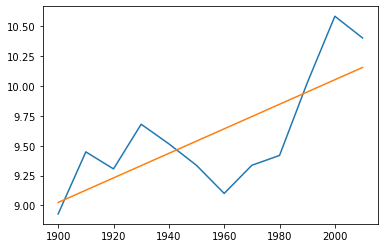

In [66]:
import numpy as np

df['decade'] = (df[' Year'] // 10) * 10

data = df.groupby('decade').aggregate(np.average)

data['decade'] = data.index

model = LinearRegression()
    
model.fit(X = data['decade'].to_numpy().reshape(-1, 1), y = data['Temperature - (Celsius)'])

data['predict'] = model.predict(X = data['decade'].to_numpy().reshape(-1, 1))

plt.figure()

plt.plot(data['decade'], data['Temperature - (Celsius)'])
plt.plot(data['decade'], data['predict'])